### Image Captioning using the Luna288/image-captioning-FACAD-base dataset from HuggingFace: https://huggingface.co/datasets/Luna288/image-captioning-FACAD-base

#### The dataset contains 123,653 images with corresponding captions of clothing and footwear, making it ideal for e-commerce caption generation.

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.7 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

ds = load_dataset("Luna288/image-captioning-FACAD-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/392 [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/365M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/364M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/123653 [00:00<?, ? examples/s]

In [ ]:
sampled_ds = ds['train'].shuffle(seed=42).select(range(25000))

captions = sampled_ds['text']
images = sampled_ds['image']

In [ ]:
def print_captions(lst):
  for i in range(5):
    print(lst[i])

In [ ]:
#cleaning the text

import re

def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower().strip()
    return text

cleaned_captions = [clean_text(caption) for caption in captions]

print_captions(cleaned_captions)

a maxi for daytime or date night move with fluttering elegance thanks to the tiered ruffled cuff and a cascading faux wrap skirt with a handkerchief hem
laser cut panel reveal a spider s web on this pointy toe boot with slingback strap and sculpted stacked heel
classic plaid elevates a smart sport coat crafted from pure italian wool and lined with bemberg rayon for a smooth fit that move naturally
complete your look with the textural intrigue of a glossy croc embossed tote that s spacious enough for all your essential
elevate any ensemble in this dazzling sequin covered blazer cut in a longline double breasted silhouette


In [ ]:
#tokenizing the captions

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

tokenized_captions = [word_tokenize(caption) for caption in cleaned_captions]

print_captions(tokenized_captions)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['a', 'maxi', 'for', 'daytime', 'or', 'date', 'night', 'move', 'with', 'fluttering', 'elegance', 'thanks', 'to', 'the', 'tiered', 'ruffled', 'cuff', 'and', 'a', 'cascading', 'faux', 'wrap', 'skirt', 'with', 'a', 'handkerchief', 'hem']
['laser', 'cut', 'panel', 'reveal', 'a', 'spider', 's', 'web', 'on', 'this', 'pointy', 'toe', 'boot', 'with', 'slingback', 'strap', 'and', 'sculpted', 'stacked', 'heel']
['classic', 'plaid', 'elevates', 'a', 'smart', 'sport', 'coat', 'crafted', 'from', 'pure', 'italian', 'wool', 'and', 'lined', 'with', 'bemberg', 'rayon', 'for', 'a', 'smooth', 'fit', 'that', 'move', 'naturally']
['complete', 'your', 'look', 'with', 'the', 'textural', 'intrigue', 'of', 'a', 'glossy', 'croc', 'embossed', 'tote', 'that', 's', 'spacious', 'enough', 'for', 'all', 'your', 'essential']
['elevate', 'any', 'ensemble', 'in', 'this', 'dazzling', 'sequin', 'covered', 'blazer', 'cut', 'in', 'a', 'longline', 'double', 'breasted', 'silhouette']


In [ ]:
#removing the stopwords

from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

filtered_captions = [
    [word for word in caption if word not in stop_words]
    for caption in tokenized_captions
]

print_captions(filtered_captions)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['maxi', 'daytime', 'date', 'night', 'move', 'fluttering', 'elegance', 'thanks', 'tiered', 'ruffled', 'cuff', 'cascading', 'faux', 'wrap', 'skirt', 'handkerchief', 'hem']
['laser', 'cut', 'panel', 'reveal', 'spider', 'web', 'pointy', 'toe', 'boot', 'slingback', 'strap', 'sculpted', 'stacked', 'heel']
['classic', 'plaid', 'elevates', 'smart', 'sport', 'coat', 'crafted', 'pure', 'italian', 'wool', 'lined', 'bemberg', 'rayon', 'smooth', 'fit', 'move', 'naturally']
['complete', 'look', 'textural', 'intrigue', 'glossy', 'croc', 'embossed', 'tote', 'spacious', 'enough', 'essential']
['elevate', 'ensemble', 'dazzling', 'sequin', 'covered', 'blazer', 'cut', 'longline', 'double', 'breasted', 'silhouette']


In [ ]:
#performing lemmatization

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

lemmatized_captions = [
    [lemmatizer.lemmatize(word) for word in caption]
    for caption in filtered_captions
]

print_captions(lemmatized_captions)

[nltk_data] Downloading package wordnet to /root/nltk_data...


['maxi', 'daytime', 'date', 'night', 'move', 'fluttering', 'elegance', 'thanks', 'tiered', 'ruffled', 'cuff', 'cascading', 'faux', 'wrap', 'skirt', 'handkerchief', 'hem']
['laser', 'cut', 'panel', 'reveal', 'spider', 'web', 'pointy', 'toe', 'boot', 'slingback', 'strap', 'sculpted', 'stacked', 'heel']
['classic', 'plaid', 'elevates', 'smart', 'sport', 'coat', 'crafted', 'pure', 'italian', 'wool', 'lined', 'bemberg', 'rayon', 'smooth', 'fit', 'move', 'naturally']
['complete', 'look', 'textural', 'intrigue', 'glossy', 'croc', 'embossed', 'tote', 'spacious', 'enough', 'essential']
['elevate', 'ensemble', 'dazzling', 'sequin', 'covered', 'blazer', 'cut', 'longline', 'double', 'breasted', 'silhouette']


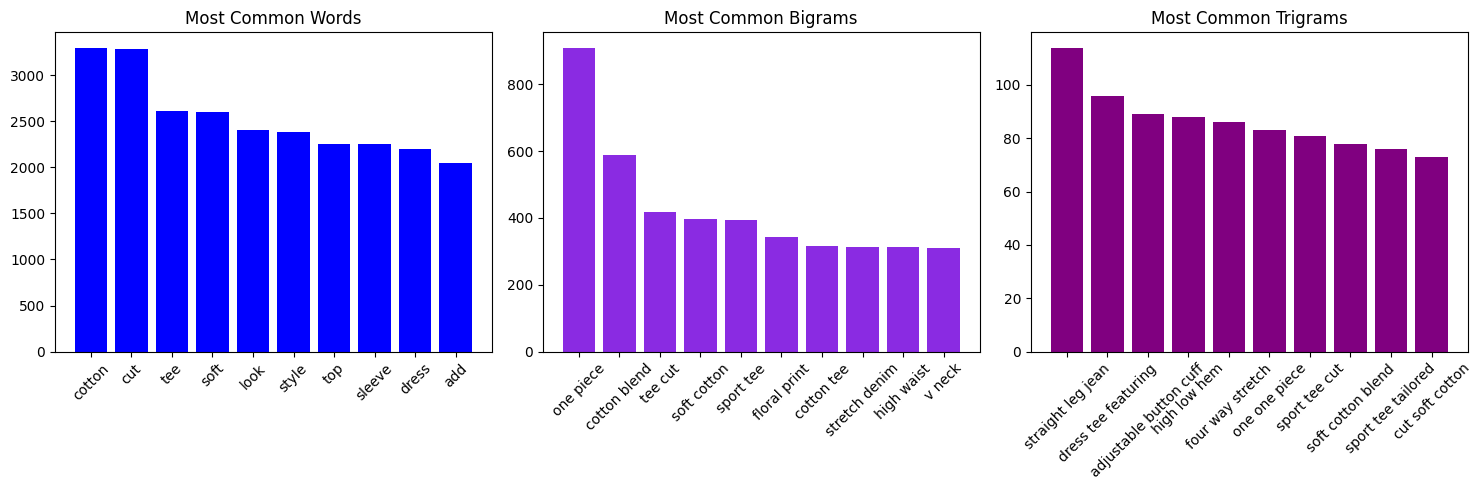

In [ ]:
#visualizing freequency counts

import matplotlib.pyplot as plt
from collections import Counter
from nltk import bigrams, trigrams

all_words = [word for caption in lemmatized_captions for word in caption]
word_freq = Counter(all_words)
bigram_freq = Counter(bigrams(all_words))
trigram_freq = Counter(trigrams(all_words))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(*zip(*word_freq.most_common(10)), color='blue')
plt.title('Most Common Words')
plt.xticks(rotation=45)

bigram_counts = bigram_freq.most_common(10)
bigram_labels, bigram_values = zip(*[(f"{word1} {word2}", count) for (word1, word2), count in bigram_counts])

plt.subplot(1, 3, 2)
plt.bar(bigram_labels, bigram_values, color='blueviolet')
plt.title('Most Common Bigrams')
plt.xticks(rotation=45)

trigram_counts = trigram_freq.most_common(10)
trigram_labels, trigram_values = zip(*[(f"{word1} {word2} {word3}", count) for (word1, word2, word3), count in trigram_counts])

plt.subplot(1, 3, 3)
plt.bar(trigram_labels, trigram_values, color='purple')
plt.title('Most Common Trigrams')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


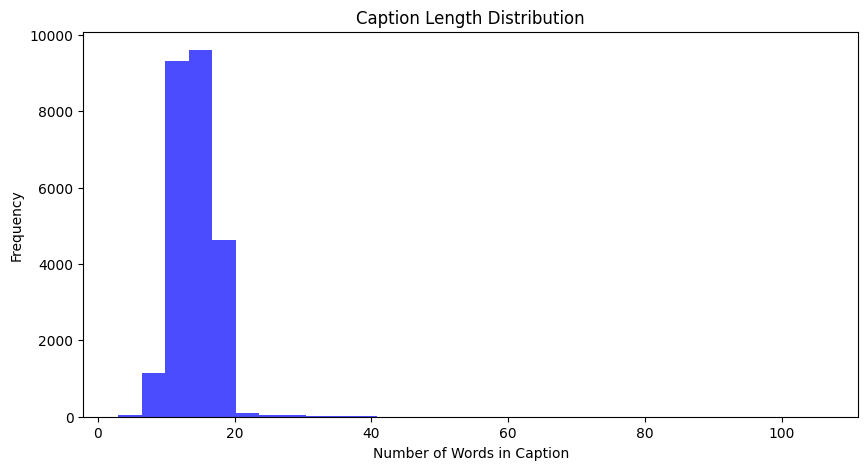

In [ ]:
#caption length distribution

caption_lengths = [len(caption) for caption in lemmatized_captions]

plt.figure(figsize=(10, 5))
plt.hist(caption_lengths, bins=30, color='blue', alpha=0.7)
plt.title('Caption Length Distribution')
plt.xlabel('Number of Words in Caption')
plt.ylabel('Frequency')
plt.show()

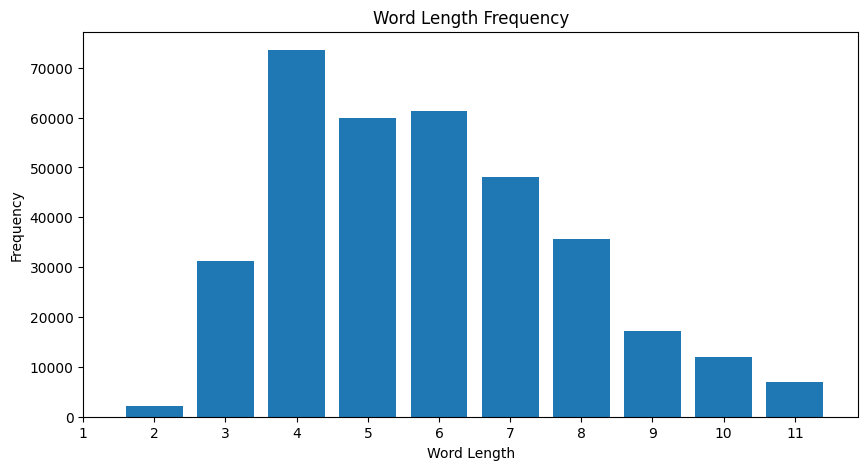

In [ ]:
#word length frequency visualization

word_length_counts = Counter(len(word) for word in all_words)

plt.figure(figsize=(10, 5))
plt.bar(*zip(*word_length_counts.most_common(10)))
plt.title('Word Length Frequency')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.xticks(range(1, 12))
plt.show()

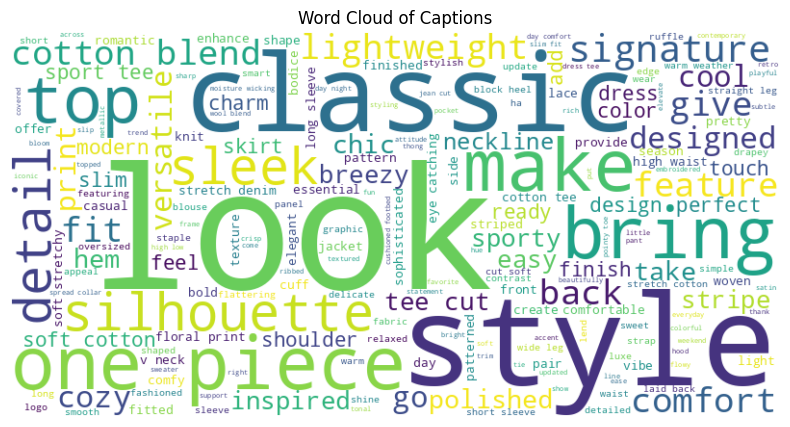

In [ ]:
#word cloud visualization

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Captions')
plt.show()


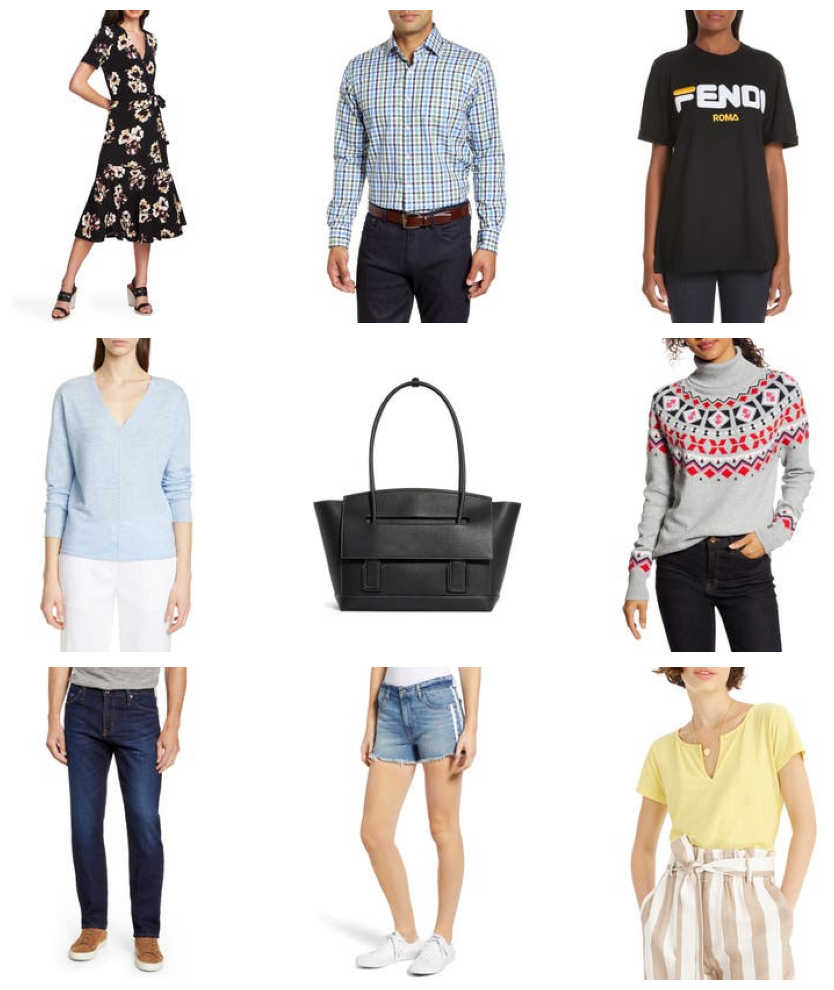

In [ ]:
#visualization of sampled images

import matplotlib.pyplot as plt

sampled_images = images[10:19]

plt.figure(figsize=(10, 10))
for i, img in enumerate(sampled_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
sampled_ds.to_parquet('sampled_dataset.parquet')

Creating parquet from Arrow format:   0%|          | 0/250 [00:00<?, ?ba/s]

161981085